<a href="https://colab.research.google.com/github/angona-biswas/Lab-Report_1608028/blob/main/ID_1608028_Lab_Report_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chittagong University of Engineering & Technology**


*Department of*

# Electronics & Telecommunication Engineering

Course Code: ETE 456

Course Title: Machine Learning Sessional

Report No.: 3

Experiment Name: Introduction to Deep Neural Network (DNN)

**Pericular task **

Experiment Date: 1.12.2021

Submission Date: 20. 12. 2021

Submitted To:  Lecturer, Eftekhar Hossain

Submitted By: 



	Name: Angona Biswas
	  ID: 1608028
     Level: 4
     Term: II


> **OBJECTIVES:** 
 1. To familiar with classification problems using different Machine Learning classification algorithms.
 2. To apply various classification algorithms on a real world dataset.
 3. To familiar with classification problems using Deep Neural Network. 
 2. To develop DNN models using Tensorflow Framework.

 > **KEY FINDINGS OF THIS EXPERIMENT:**

 The workflow of this experiment is written using bullet points: 
 1. Importing the functions, dataset load, dataset read.
 2. Data Preprocessing: Checking the missing value of the dataset and handling the missing values if there is.
 3. Declaring features and target of this dataset.
 4. Data Preprocessing: Encoding the categorical data using One Hot Encoding and Level Encoding. Declaring the new converted features again for clasification. 
 5. Data Spliting for training and test, where 80% data is taken for training and 20% data for test. 
 6. Data Preprocessing: Data normalizing if necessary and observe the further effect.
 7. Fitting the classifier models (Logistic Regession, K-Nearest Neighbour, Support Vector Machine, Decision Tree, Random Forest Classifier and Gaussian Naive Bayes) for  train dataset.
 8. Making prediction based on these models with test data and plot the confusin matrices and evaluate other evaluation parameters.
 9. Building a multilayer neural network with Tensorflow Keras. 
 10. Training the DNN model and observe the test result of the model.
 11. For more analysis, number of neurons and hidden layes are changes and the classification performance is observed.  
 12. Conclude the all types of analysis at the 'CONCLUSION' section. 


 


**CODE AND OUTPUTS:** 

In [ ]:
 import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
# Download the data
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-12 14:03:47--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-12 14:03:47--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc19e5647139a0af9e1e3100b68b.dl.dropboxusercontent.com/cd/0/inline/BbsNteSlY2WZBTag0XscwJHtoD1PV01ogS4CM6cQujDk9epOwAHWUwu4dEhPFX3HTvGkQ0ff_ubwOLfcU9XtNVTy_-M-9uEdG3syz5Zitu1u-dwfFDL-7tFthBQnt3CoBH6aaKdPJKAcigixLHCLfE9B/file# [following]
--2021-12-12 14:03:48--  https://uc19e5647139a0af9e1e3100b68b.dl.dropboxusercontent.com/cd/0/inline/BbsNteSlY2WZBTag0XscwJHtoD1PV01ogS4CM6cQujDk9epOwAHWUwu4dEhPFX3HTvGkQ0ff_ubwOLfcU9XtN

In [ ]:
# importing the dataset
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Check the missing value of the dataset 
# Check the each column 
dataset[pd.isnull(dataset.Outcome)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
Data Preprocessing:

In [ ]:
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# There is no missing data found so no missing data handling is necessary.  

In [ ]:
dataset

In [ ]:
dataset.SkinThickness.fillna("Unknown")

0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 768, dtype: int64

In [ ]:
# Declare the features and the Target
feature = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # for independent
target = dataset[['Outcome']]   # for dependent

In [ ]:
# As there is no categorical data, no need of Encoding 

In [ ]:
# Dataset Spliting into Training and Test Set
#80% data is taken for training and 20% data for test
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)

In [ ]:
#Observe the shape of train set and test shape 
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [ ]:
# Feature Scaling is not necessary as there is no large value in actual dataset columns: 

In [ ]:
Machine Learning Classifier Models: 

In [ ]:
# Logistic Regression Classification
# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()
lr.fit(X_train,y_train)
# prediction
y_pred_lr = lr.predict(X_test)
# Using KNN Classifier
# Classifier Model
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
knn.fit(X_train,y_train)
# Prediction
y_pred_knn = knn.predict(X_test)
# SVM Classifier Model
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train,y_train)
# Prediction
y_pred_svm = svm.predict(X_test)
# Using Decision Tree Classifier
# Classifier Model
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train,y_train)
# Prediction
y_pred_dt = dt.predict(X_test)
# Using Random Forest Classifier
# Classifier Model
rf = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
rf.fit(X_train,y_train)
# Prediction
y_pred_rf = rf.predict(X_test)
#Using Gaussin naive bias Classifier Model 
gnb = GaussianNB()
gnb.fit(X_train,y_train)
# Prediction
y_pred_gnb = gnb.predict(X_test)

[[98  9]
 [18 29]]


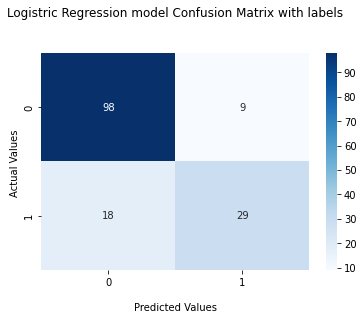

              precision    recall  f1-score   support

          No       0.84      0.92      0.88       107
         Yes       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [ ]:
# Making confusing matrix for Logistic Regression Classifier model

print(confusion_matrix(y_test,y_pred_lr))
cf_matrix= confusion_matrix(y_test,y_pred_lr)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Logistric Regression model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_lr,target_names = ['No','Yes']))

[[87 20]
 [18 29]]


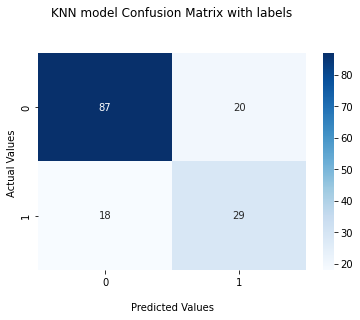

              precision    recall  f1-score   support

          No       0.83      0.81      0.82       107
         Yes       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
# Making confusing matrix KNN model

print(confusion_matrix(y_test,y_pred_knn))
cf_matrix= confusion_matrix(y_test,y_pred_knn)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('KNN model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_knn,target_names = ['No','Yes']))

[[97 10]
 [18 29]]


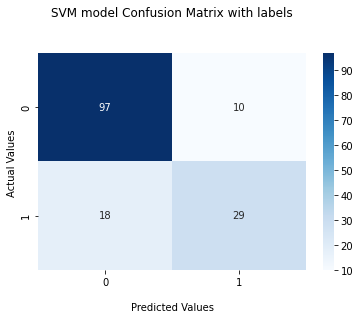

              precision    recall  f1-score   support

          No       0.84      0.91      0.87       107
         Yes       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [ ]:
# Making confusing matrix for SVM model

print(confusion_matrix(y_test,y_pred_svm))
cf_matrix= confusion_matrix(y_test,y_pred_svm)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('SVM model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_svm,target_names = ['No','Yes']))

[[79 28]
 [17 30]]


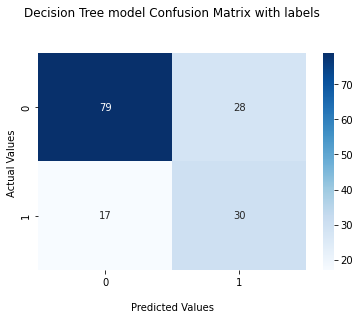

              precision    recall  f1-score   support

          No       0.82      0.74      0.78       107
         Yes       0.52      0.64      0.57        47

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.73      0.71      0.72       154



In [ ]:
# Making confusing matrix for Decision Tree

print(confusion_matrix(y_test,y_pred_dt))
cf_matrix= confusion_matrix(y_test,y_pred_dt)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Decision Tree model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_dt,target_names = ['No','Yes']))

[[94 13]
 [20 27]]


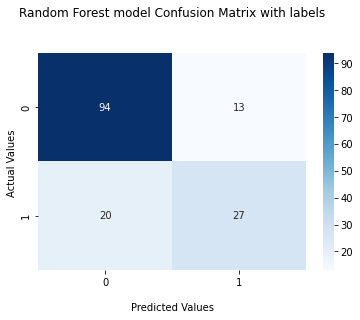

              precision    recall  f1-score   support

          No       0.82      0.88      0.85       107
         Yes       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
# Making confusing matrix for Random Forest Classifier

print(confusion_matrix(y_test,y_pred_rf))
cf_matrix= confusion_matrix(y_test,y_pred_rf)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Random Forest model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_rf,target_names = ['No','Yes']))

[[93 14]
 [18 29]]


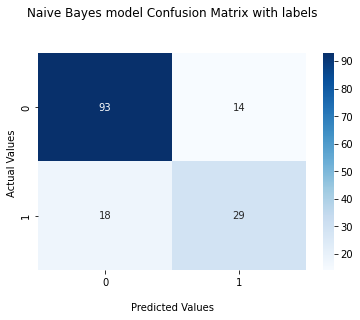

              precision    recall  f1-score   support

          No       0.84      0.87      0.85       107
         Yes       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
# Making confusing matrix Naive Bayes model

print(confusion_matrix(y_test,y_pred_gnb))
cf_matrix= confusion_matrix(y_test,y_pred_gnb)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Naive Bayes model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred_gnb,target_names = ['No','Yes']))

In [ ]:
#Builting the neural network architecture
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                90        
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 8.1110 - accuracy: 0.3714 - val_loss: 3.6646 - val_accuracy: 0.3871
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 2.3134 - accuracy: 0.3859 - val_loss: 1.0244 - val_accuracy: 0.5645
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 1.2812 - accuracy: 0.5562 - val_loss: 0.7834 - val_accuracy: 0.6935
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 1.0012 - accuracy: 0.5018 - val_loss: 0.7474 - val_accuracy: 0.6129
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.8864 - accuracy: 0.5344 - val_loss: 0.6673 - val_accuracy: 0.7258
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.8234 - accuracy: 0.5580 - val_loss: 0.6477 - val_accuracy: 0.6774
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7858 - accuracy: 0.5652 - val_loss: 0.6087 - val_accuracy: 0.6935
Epoch 8/100


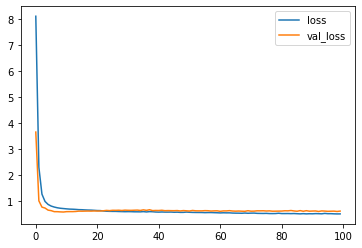

In [ ]:
#plot the training loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.legend()

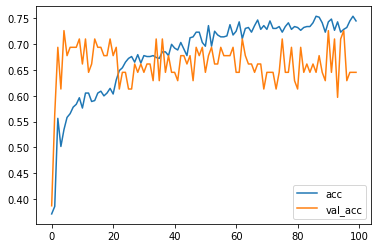

In [ ]:
#plot the train accuracy and validation accuracy of the dataset
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')
plt.legend()

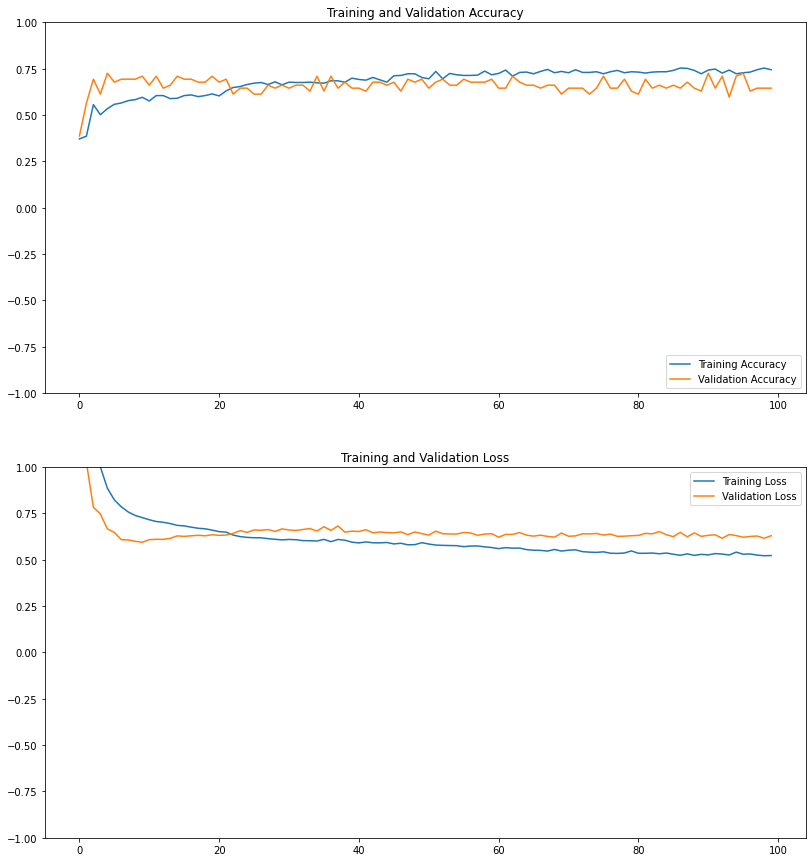

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(30, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 3)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Prediction
y_pred = model.predict(X_test)

In [ ]:
#Setting up a threshold value: 
y_pred = y_pred > 0.5

In [ ]:
# Conversion to numerical value:
pred = y_pred.astype('uint8')

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       107
           1       0.62      0.60      0.61        47

    accuracy                           0.77       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
CONCLUSION: 

From above result analysis, the following things can be concluded:

1. Confusion Matrix analysis of Machine Learning Classifiers: 
(a) LogisticRegression:- accuracy: 82%; precision: 80%; recall: 77%; f1-score: 75%.
(b) K-Nearest Neighbor:- accuracy: 75%; precision: 71%; recall: 72%; f1-score: 71%.
(c) Support Vector Machine:- accuracy: 82%; precision: 79%; recall: 76%; f1-score: 77%.
(d) DecisionTreeClassifier:- accuracy: 71%; precision: 67%; recall: 69%; f1-score: 67%.
(e) RandomForestClassifier:- accuracy: 79%; precision: 75%; recall: 73%; f1-score: 74%.
(f) GaussianNB:- accuracy: 79%; precision: 76%; recall: 74%; f1-score: 75%.

2. DNN Model evaluation with effective parameters: 
Number of Hidden Layer: 1 and Number of neuron: 10:- accuracy: 71%; precision: 64%; recall: 58%; f1-score: 58%.   
Number of Hidden Layer: 1 and Number of neuron: 20:- accuracy: 69%; precision: 62%; recall: 58%; f1-score: 58%. 
Number of Hidden Layer: 2 and Number of neuron (layer1): 20 & Number of neuron(layer2): 10:- accuracy: 69%; precision: 62%; recall: 58%; f1-score: 58%. 
Number of Hidden Layer: 2 and Number of neuron (layer1): 10 & Number of neuron(layer2): 10:- accuracy: 77%; precision: 72%; recall: 72%; f1-score: 72%. 

The best classification accuracy is found from 'LogisticRegression' and 'Support Vector Machine' classifier and that is 82% accuracy. 